In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sklearn


In [4]:
df = pd.read_csv("ToyotaCorolla.csv")
print(df.head())
print(df.info())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null  

In [5]:
print(df.isnull().sum) #cheking missing values
print(df.describe()) #Sumarize Statistic

<bound method DataFrame.sum of       Price  Age_08_04     KM  Fuel_Type     HP  Automatic     cc  Doors  \
0     False      False  False      False  False      False  False  False   
1     False      False  False      False  False      False  False  False   
2     False      False  False      False  False      False  False  False   
3     False      False  False      False  False      False  False  False   
4     False      False  False      False  False      False  False  False   
...     ...        ...    ...        ...    ...        ...    ...    ...   
1431  False      False  False      False  False      False  False  False   
1432  False      False  False      False  False      False  False  False   
1433  False      False  False      False  False      False  False  False   
1434  False      False  False      False  False      False  False  False   
1435  False      False  False      False  False      False  False  False   

      Cylinders  Gears  Weight  
0         False  False 

##1.Exploratory Data Analysis (EDA)&  Data Preprocessing

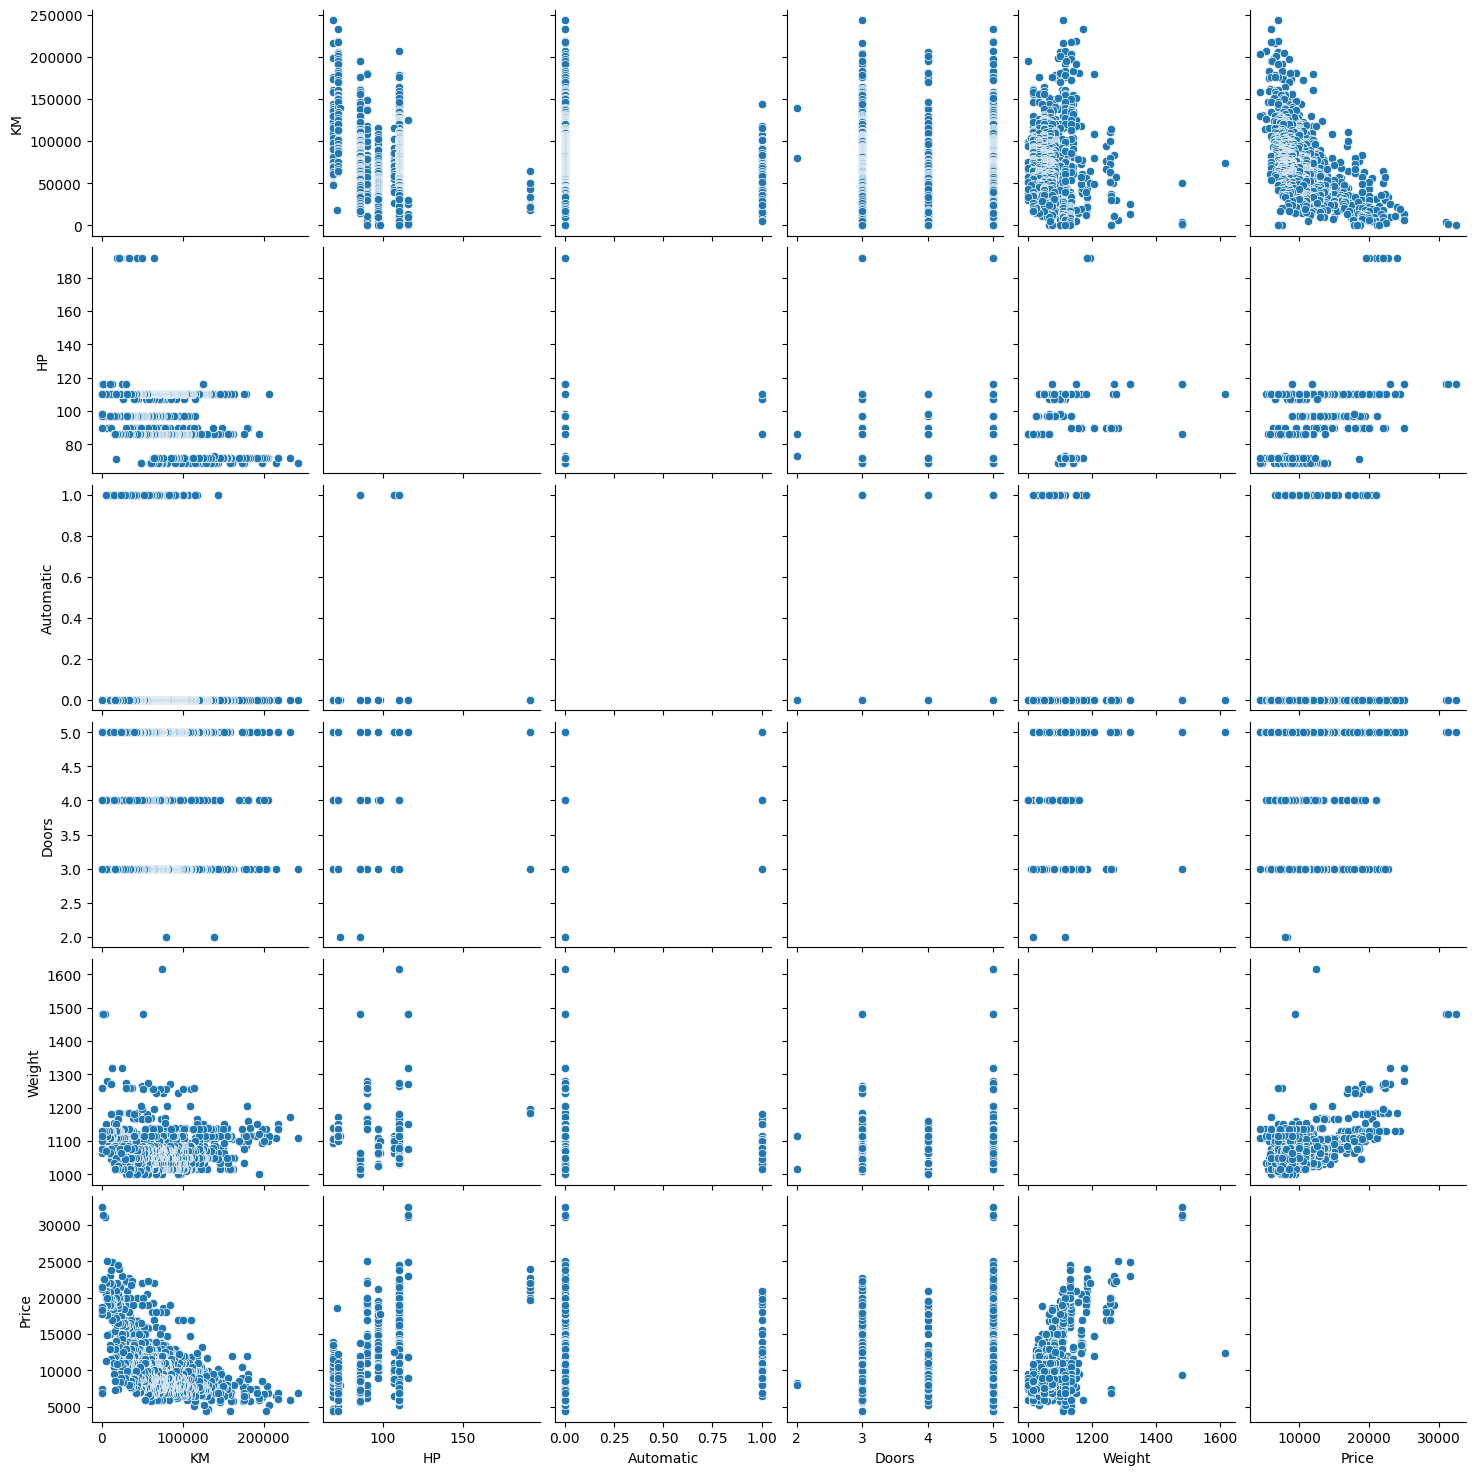

In [6]:
sns.pairplot(df[['KM','HP','Automatic','Doors','Weight','Price']],diag_kind='Kde')
#Visualizations

<Axes: >

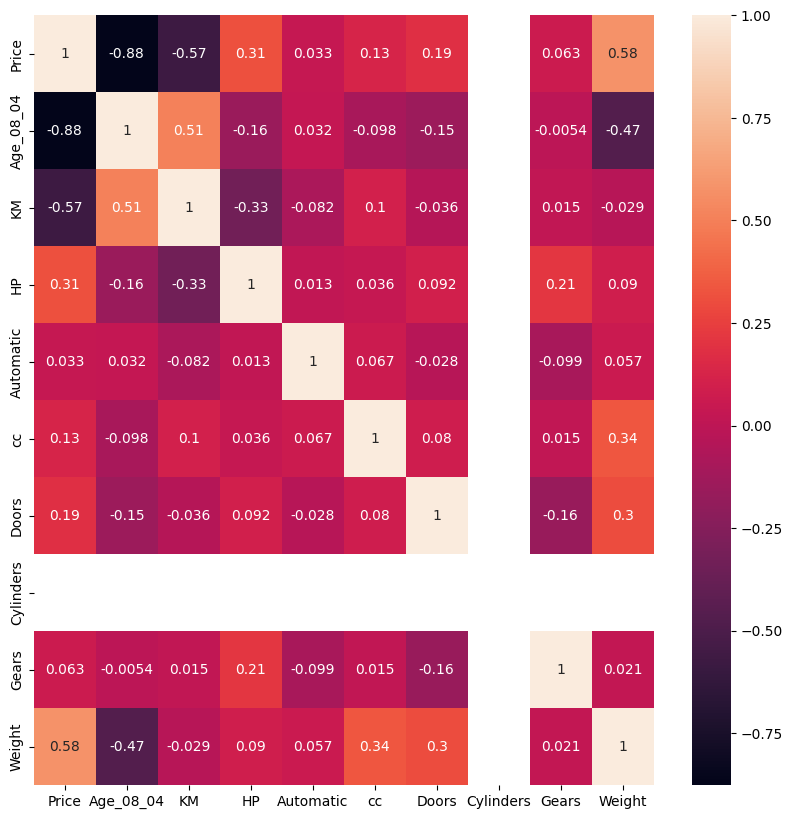

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop('Fuel_Type', axis=1).corr(),annot=True)

In [8]:
# Convert categorical variable 'Fuel_Type' using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Print columns after get_dummies to check
print("Columns after get_dummies:", df.columns)

# Drop or fill any remaining missing values
df.dropna(inplace=True)

# Select features and target
X = df[['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Weight',
        'Fuel_Type_Diesel', 'Fuel_Type_Petrol']]  # Corrected column names
y = df['Price']

Columns after get_dummies: Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')


##2.Split into Training and Testing Sets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=20)


In [10]:
splits = [X_train, X_test, y_train, y_test]
for split in splits:
    print(split.shape)

(287, 9)
(1149, 9)
(287,)
(1149,)


##3.Build Multiple Linear Regression Models

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [13]:
print("Model1 R2:", r2_score(y_test, y_pred))
print("Model1 RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Model1 Coffieficent:", model1.coef_)
print("Model1 Intercept:", model1.intercept_)
#all Features

Model1 R2: 0.8292426240122395
Model1 RMSE: 1499.5279654187352
Model1 Coffieficent: [-1.08168307e+02 -1.83343064e-02 -3.35907441e+00 -3.29454679e+02
 -7.15336883e-01 -1.44582107e+02  3.70036920e+01 -1.29480875e+03
  1.38751895e+03]
Model1 Intercept: -20672.36964692053


In [14]:
X2 = X.drop(columns=['Doors', 'cc'])
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
print("Model 2 R2:", r2_score(y2_test, model2.predict(X2_test)))
#Model 2: Exclude 'Doors' and 'CC'

Model 2 R2: 0.8347720832928458


In [15]:
X3 = X[['Age_08_04', 'HP', 'Weight']]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)
model3 = LinearRegression()
model3.fit(X3_train, y3_train)
print("Model 3 R2:", r2_score(y3_test, model3.predict(X3_test)))
#Model 3: Only top correlated features

Model 3 R2: 0.8315557548230361


##4.Performance of model using testing datasets

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
y_pred1 = model1.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
mae = mean_absolute_error(y_test, y_pred1)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f} Euros")
print(f"MAE: {mae:.2f} Euros")


R² Score: 0.8292
RMSE: 1499.53 Euros
MAE: 965.27 Euros


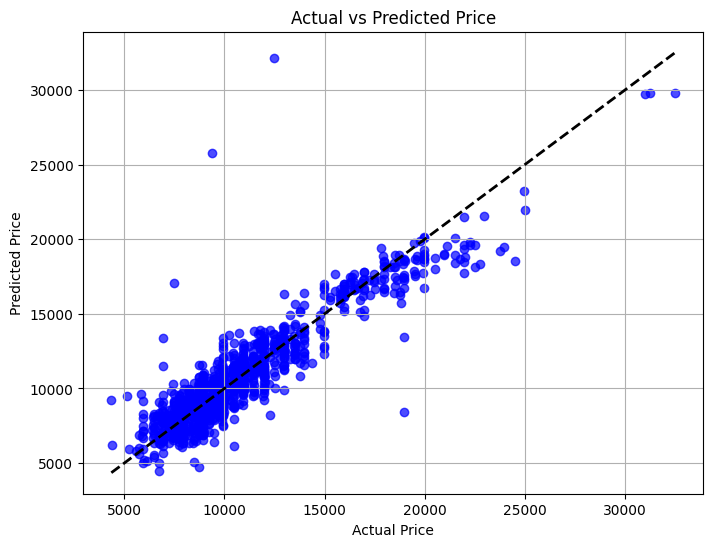

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred1, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.grid(True)
plt.show()


##5.Apply Ridge and Lasso

In [18]:
from sklearn.linear_model import Ridge, Lasso

In [19]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge R2:", r2_score(y_test, ridge.predict(X_test)))


Ridge R2: 0.8146158217017349


In [20]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
print("Lasso R2:", r2_score(y_test, lasso.predict(X_test)))

Lasso R2: 0.8250847110923861


##6.Conclusion

1.Model 1 with all features gave the best accuracy (highest R²).

2.Model 2 and 3 show how removing features affects performance.

3.Ridge and Lasso help in regularization. Lasso may reduce coefficients to zero for unimportant variables.

#1.What is Normalization & Standardization and how is it helpful?

. Normalization (Min-Max Scaling)
o Scales all features to a range, typically [0, 1].

· X' = X-Xmin/Xmax-Xmin

· Standardization (Z-score Scaling)

o Centers the features around mean = 0, std = 1.

· Χ' = Χ-μ/σ

# 2.What techniques can be used to address multicollinearity in multiple linear
regression?

1. Removing Redundant Predictors Drop one of any two features that are highly correlated.

· Reduces noise and simplifies the model.

2. Combining Correlated Variables Instead of dropping, combine them into a new feature.
o Uses domain knowledge to engineer better predictors.

3. Using Regularization (Ridge, Lasso, ElasticNet) These penalize large or unnecessary coefficients.
o Ridge shrinks correlated features.

o Lasso can set them to zero (feature selection).

o ElasticNet blends both approaches.

4. Collecting More Data More samples reduce variance and stabilize coefficient estimates.

· Especially helpful when multicollinearity arises from small datasets.

5. Dimensionality Reduction (PCA) Transforms features into uncorrelated principal components.

· Keeps essential info while removing redundant variance.

.

.

.